<a href="https://colab.research.google.com/github/mshadabgithub/TensorFlow-Examples/blob/master/w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import re

corpus_raw = "I love python. It's amazing language to read:). Many data scientist prefer python over other languages. Any it is super easy to learn."
corpus_raw = re.sub(r"[,@\'?\.$%_]", '', corpus_raw)

corpus_raw = corpus_raw.lower()
corpus_raw

'i love python its amazing language to read:) many data scientist prefer python over other languages any it is super easy to learn'

In [ ]:
words = []
for word in corpus_raw.split():
    if word != '.': 
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) 

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [ ]:
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [ ]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [ ]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

In [ ]:
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(x_train.shape[1], activation='relu')
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0616 - mae: 0.1320
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 0.0612 - mae: 0.1299
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0594 - mae: 0.1260
Epoch 4/20
3/3 [==============================] - 0s 3ms/step - loss: 0.0604 - mae: 0.1261
Epoch 5/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0600 - mae: 0.1246
Epoch 6/20
3/3 [==============================] - 0s 3ms/step - loss: 0.0589 - mae: 0.1214
Epoch 7/20
3/3 [==============================] - 0s 3ms/step - loss: 0.0570 - mae: 0.1185
Epoch 8/20
3/3 [==============================] - 0s 2ms/step - loss: 0.0576 - mae: 0.1179
Epoch 9/20
3/3 [==============================] - 0s 3ms/step - loss: 0.0566 - mae: 0.1159
Epoch 10/20
3/3 [==============================] - 0s 2ms/step - loss: 0.0562 - mae: 0.1144
Epoch 11/20
3/3 [==============================] - 0s 3ms/step - loss: 0.0548 - mae: 0.11

In [ ]:
w = model.predict(x_train)

In [ ]:
def eucli_dist(w1, w2):
  return np.sqrt(np.sum(w1-w2)**2)
  
w[word_index]

array([0.        , 0.        , 0.08269319, 0.        , 0.12133045,
       0.17416593, 0.06076346, 0.15377396, 0.        , 0.        ,
       0.        , 0.15339412, 0.        , 0.02967604, 0.        ,
       0.        , 0.        , 0.25190252, 0.12718289, 0.        ,
       0.11434083], dtype=float32)

In [ ]:
def find_closest(word_index, w):
  min_dist = 10000
  min_index = -1
  q_w = w[word_index]
  for index, vector in enumerate(w):
    if eucli_dist(vector, q_w) < min_dist and not np.array_equal(vector, q_w):
      min_dist = eucli_dist(vector, q_w)
      min_index = index
  return min_index

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(w) 

from sklearn import preprocessing

In [ ]:
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)

import matplotlib.pyplot as plt

[[-0.12271661  0.9924417 ]
 [-0.04339222  0.9990581 ]
 [ 0.8385749   0.5447864 ]
 [ 0.8916482   0.45272902]
 [ 0.8923825   0.45127973]
 [-0.08174478 -0.99665326]
 [ 0.0031625  -0.999995  ]
 [ 0.18327025 -0.98306257]
 [ 0.26672047 -0.9637739 ]
 [-0.49686888 -0.8678257 ]
 [-0.44727334 -0.8943973 ]
 [-0.40301472 -0.9151935 ]
 [-0.54633653 -0.8375658 ]
 [-0.9828981  -0.18415004]
 [-0.9999961   0.00278735]
 [-0.9828687  -0.18430732]
 [-0.99971825 -0.02373799]
 [-0.34336805  0.93920094]
 [-0.49385798  0.8695426 ]
 [-0.28650624  0.9580783 ]
 [-0.10095912  0.9948906 ]
 [ 0.7778446   0.6284566 ]
 [ 0.92052335  0.39068756]
 [ 0.5887035   0.8083491 ]
 [ 0.88718915  0.46140587]
 [ 0.9374371  -0.34815454]
 [ 0.9336927  -0.35807532]
 [ 0.9049807  -0.4254524 ]
 [ 0.96091145 -0.27685592]
 [ 0.04286769  0.9990807 ]
 [ 0.17555037  0.9844705 ]
 [ 0.30692387  0.95173407]
 [ 0.17729999  0.98415685]
 [ 0.65846586  0.75261056]
 [-0.09087534  0.99586225]
 [ 0.28954804  0.95716345]
 [ 0.30101925  0.95361805]
 

{'love', 'it', 'languages', 'super', 'easy', 'scientist', 'other', 'python', 'many', 'learn', 'read:)', 'over', 'prefer', 'i', 'amazing', 'its', 'to', 'data', 'is', 'any', 'language'}
love 0.9924417
it 0.9990581
languages 0.5447864
super 0.45272902
easy 0.45127973
scientist -0.99665326
other -0.999995
python -0.98306257
many -0.9637739
learn -0.8678257
read:) -0.8943973
over -0.9151935
prefer -0.8375658
i -0.18415004
amazing 0.00278735
its -0.18430732
to -0.023737986
data 0.93920094
is 0.8695426
any 0.9580783
language 0.9948906


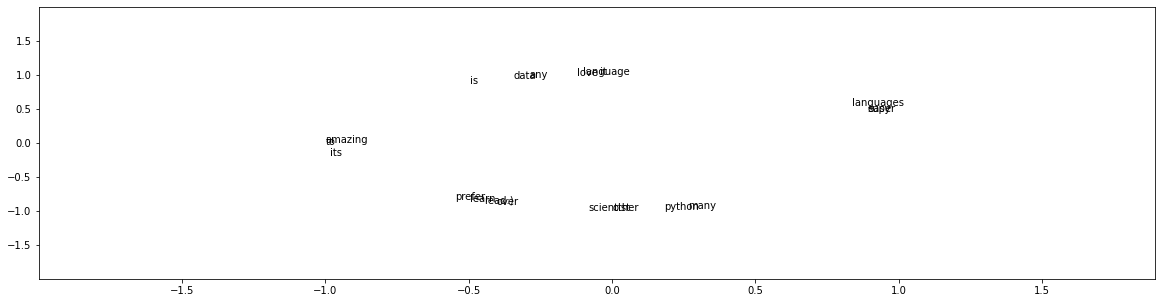

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    ax.set_xlim(min([vectors[word2int[w]][0] for w in words])-1, max([vectors[word2int[w]][0] for w in words])+1)
    ax.set_ylim(min([vectors[word2int[w]][1] for w in words])-1, max([vectors[word2int[w]][1] for w in words])+1)
plt.show()